<a href="https://colab.research.google.com/github/chizhenn/DS-ML-Projects/blob/main/Crab_Age_Prediction_Using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

##**Mount Google Drive**

In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Import dataset
import pandas as pd
dataset = "/content/gdrive/MyDrive/Colab Notebooks/ModifiedCrabAgePrediction.csv"
df = pd.read_csv (dataset, header=0)

##**Gain insights into the data**

In [ ]:
df.head(5)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [ ]:
df.tail(5)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
3495,I,0.9375,0.6875,0.2375,6.988152,3.118445,1.176504,2.197086,6
3496,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3497,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3498,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6
3499,I,0.7875,0.6125,0.2125,4.068153,1.502523,1.346601,1.417475,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3500 non-null   object 
 1   Length          3456 non-null   float64
 2   Diameter        3468 non-null   float64
 3   Height          3413 non-null   float64
 4   Weight          3462 non-null   float64
 5   Shucked Weight  3500 non-null   float64
 6   Viscera Weight  3500 non-null   float64
 7   Shell Weight    3500 non-null   float64
 8   Age             3500 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 246.2+ KB


- The dataset consists of object, int, float as the datatypes.

- Most of the colums consist of 'float' datatypes.

- There are several columns contain missing values, such as 'Length', 'Diameter', 'Height', 'Weight'


In [ ]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3456.000000,3468.000000,3413.000000,3462.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1.314131,1.022365,0.350509,23.786946,10.283194,5.168507,6.831221,9.977714
std,0.299806,0.248250,0.106293,13.920088,6.297363,3.116262,3.945384,3.216236
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.813974,5.372230,2.689659,3.752765,8.000000
50%,1.375000,1.062500,0.362500,23.119017,9.695529,4.890289,6.704657,10.000000
75%,1.537500,1.200000,0.412500,33.020080,14.330672,7.257472,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


##**Identify the features and target variable**

In [ ]:
import numpy as np
features = df.iloc[:, :-1]
target = df.iloc[:, -1]

print("\nFeatures: ", features.columns)
print("\nTarget variable: ", target.name)



Features:  Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

Target variable:  Age


#Data Preprocessing

##**Handle missing values**

In [ ]:
df.isna().sum()

Sex                0
Length            44
Diameter          32
Height            87
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64

**Drop rows with missing values**

In [ ]:
print("\nRemove all rows with missing data by using dropna()")
df = df.dropna ()
print(df.isna().sum())



Remove all rows with missing data by using dropna()
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


**Check for duplicate entries**

In [ ]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f'Number of duplicates: {num_duplicates}')

Number of duplicates: 0


After cleaning:
- There are no columns whith missing values
- No duplicate entries
- Remaining total rows: 3308

##**Handle noisy values**

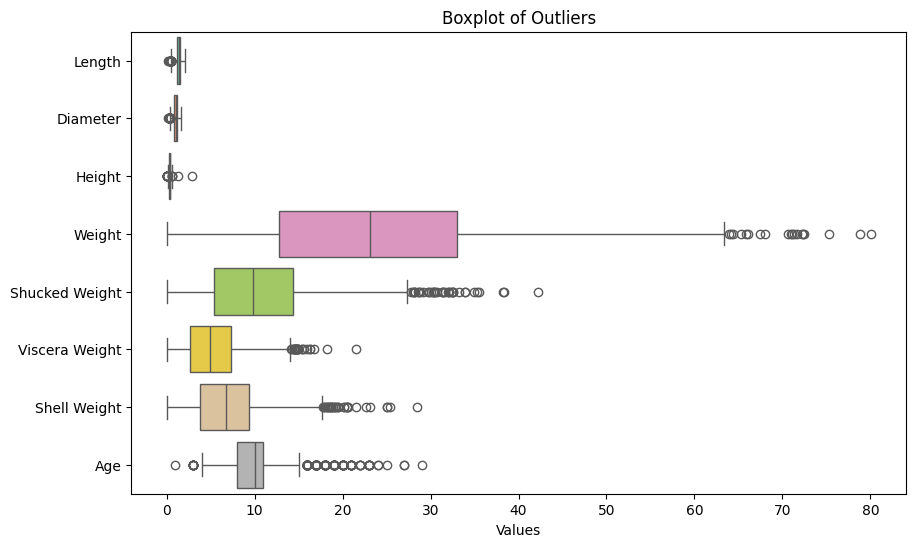

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

columns = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']

# Create a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df[columns], orient="h", palette="Set2", whis=1.5)  # Set whis to adjust the whiskers length
plt.title('Boxplot of Outliers')
plt.xlabel('Values')
plt.show()


In my analysis, **I keep outliers in the dataset**. This way, I don't lose any important information, like rare or extreme events. It helps me avoid making biased conclusions and ensures that my results truly represent the variability in the data. Also, it lets me use analysis techniques that can handle extreme values well, giving me a better overall understanding of the dataset.

##**Handle categorical variables**

In [ ]:
# Check for categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['Sex'], dtype='object')


In [ ]:
levels = len (pd.value_counts(df['Sex']))
print ('There are {} levels in the Sex column'.format (levels))

There are 3 levels in the Sex column


In [ ]:
df = pd.get_dummies(df, columns=['Sex'])
print (df.head())
print ('There are {} columns in the updated df'.format (df.shape[1]))

   Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  Sex_F  Sex_I  Sex_M  
0      6.747181    9   True  False  False  
1      1.559222    6  False  False   True  
2      2.764076    6  False   True  False  
3      5.244657   10   True  False  False  
4      1.700970    6  False   True  False  
There are 11 columns in the updated df


'Sex' column is nominal, not ordinal, since it consists of distinct categories (e.g., male and female) without inherent order. Hence, dummy encoding (one-hot encoding) is used instead of label encoder which is more suitable to handle ordinal categorical data.

##**Scale the numerical features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns

# Scale the numerical features using MinMaxScaler
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0.675676,0.697479,0.146018,0.307066,0.291863,0.258723,0.235675,0.285714,True,False,False
1,0.378378,0.344538,0.075221,0.066761,0.053800,0.063199,0.053313,0.178571,False,False,True
2,0.459459,0.428571,0.088496,0.098636,0.075992,0.073733,0.095665,0.178571,False,True,False
3,0.533784,0.504202,0.088496,0.167700,0.111970,0.105332,0.182860,0.321429,True,False,False
4,0.378378,0.352941,0.075221,0.085532,0.081372,0.068466,0.058296,0.178571,False,True,False


MinMaxScaler is chosen over StandardScaler when numerical features need to be kept within a particular range, usually between 0 and 1. It maintains the relative differences between data points while ensuring they fit into this range. This is beneficial for algorithms that require features to have similar scales. MinMaxScaler can lead to more accurate results, especially when the data doesn't follow a normal distribution or when potential biases introduced by standardization need to be avoided.

**Shuffle**

In [ ]:
from sklearn.utils import shuffle
df = shuffle (df, random_state=42)
df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
53,0.689189,0.672269,0.132743,0.348858,0.292199,0.272548,0.307424,0.357143,False,False,True
708,0.682432,0.647059,0.154867,0.379316,0.268662,0.308097,0.332337,0.642857,True,False,False
1306,0.797297,0.806723,0.172566,0.568089,0.386348,0.510204,0.476831,0.464286,False,False,True
970,0.520270,0.504202,0.097345,0.146272,0.143914,0.107307,0.128052,0.392857,False,False,True
214,0.837838,0.831933,0.181416,0.768904,0.761264,0.613562,0.492775,0.321429,False,False,True


Shuffling to randomise the data, to avoid biasness


##**Select features and target variable**

In [ ]:
# DV => Dependent variable
DV = 'Age'

# We drop DV,so that x only have the independent variables
X = df.drop (DV, axis=1) # axis=1, drop the DV column
y = df[DV]

##**Split the dataset into training and testing sets**


**Training set(80%)**

**Testing set (20%)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
1900,0.695946,0.680672,0.128319,0.318576,0.281103,0.234365,0.257598,False,True,False
1202,0.614865,0.596639,0.132743,0.216044,0.163080,0.200132,0.187344,False,True,False
3075,0.540541,0.529412,0.110619,0.189481,0.148621,0.159315,0.147982,False,False,True
20,0.655405,0.605042,0.115044,0.268992,0.247814,0.223173,0.193323,False,False,True
404,0.533784,0.521008,0.092920,0.148220,0.108944,0.135616,0.138017,True,False,False
...,...,...,...,...,...,...,...,...,...,...
660,0.581081,0.554622,0.128319,0.239242,0.158036,0.235023,0.197808,False,False,True
2160,0.709459,0.705882,0.150442,0.384629,0.329186,0.325214,0.307424,True,False,False
2147,0.635135,0.605042,0.132743,0.259076,0.187290,0.213957,0.216243,True,False,False
829,0.290541,0.268908,0.053097,0.038782,0.034970,0.023700,0.030394,False,True,False


#Regression Model Development

##**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model_Linear = LinearRegression()
model_Linear.fit(X_train,y_train)

LinearRegression()

**Calculate**:
1. interception points
2. coefficients values

In [ ]:
# Extract Intercept Value
intercept = model_Linear.intercept_

# Extract Coefficient Value
coefficients = model_Linear.coef_

In [ ]:
# Print formula for Predicting Age
print('Age = {0:0.2f} + ({1:0.2f} x Sex) + ({2:0.2f} x Length) + ({3:0.2f} x Diameter) +({4:0.2f} x Height) + ({5:0.2f} x Weight) + ({6:0.2f} x Shucked Weight) + ({7:0.2f} x Viscera Weight) + ({8:0.2f} x Shell Weight)'.format(intercept,
coefficients[0],
coefficients[1],
coefficients[2],
coefficients[3],
coefficients[4],
coefficients[5],
coefficients[6],
coefficients[7]))

Age = 2772826933378.11 + (-0.05 x Sex) + (0.29 x Length) + (0.31 x Diameter) +(0.84 x Height) + (-1.02 x Weight) + (-0.25 x Shucked Weight) + (0.31 x Viscera Weight) + (-2772826933377.97 x Shell Weight)


The coefficients show us which variables have the biggest influence on the dependent variable (DV)

In [ ]:
predictions_Linear = model_Linear.predict(X_test)

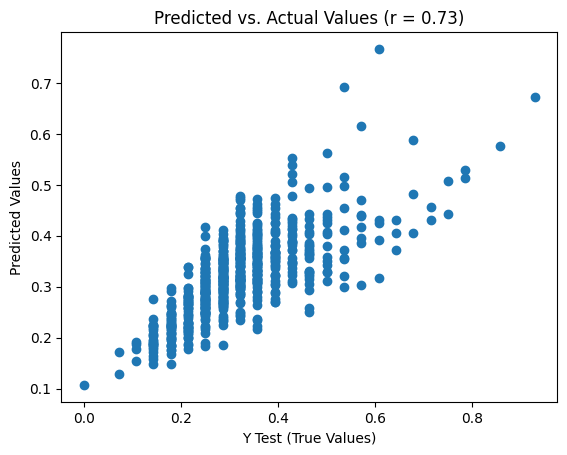

In [ ]:
# Creating a Correlation Coefficient and Display on Plot Title
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions_Linear)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions_Linear)[0], 2))
plt.show()

<ipython-input-77-3f4120f98991>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - predictions_Linear), bins = 50)


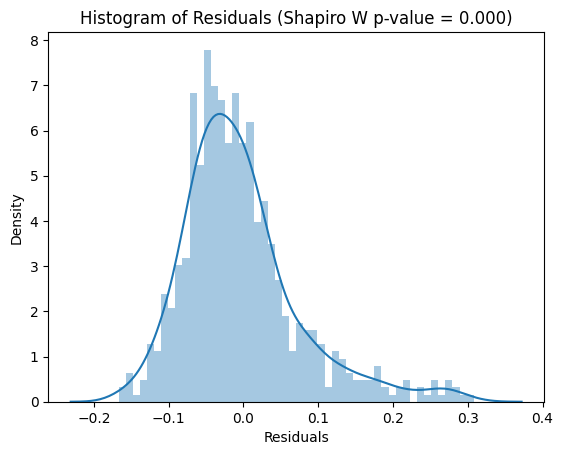

In [ ]:
# Create a density plot of the residuals.
import seaborn as sns
from scipy.stats import shapiro
sns.distplot ((y_test - predictions_Linear), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test -predictions_Linear)[1]))
plt.show()


In [ ]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_squared_error (y_test, predictions_Linear),
np.sqrt (metrics.mean_squared_error (y_test, predictions_Linear)),
metrics.explained_variance_score (y_test, predictions_Linear)]}).round(3)
print(metrics_df)

      Metric  Value
0        MSE  0.006
1       RMSE  0.078
2  R-Squared  0.539


##**Polynomial Regression**

**Experiment with different degrees**

**degree**=1

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the degree of the polynomial
degree = 1

# Create a polynomial regression model
model_Polynomial1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [ ]:
model_Polynomial1.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [ ]:
predictions_Polynomial1 = model_Polynomial1.predict(X_test)

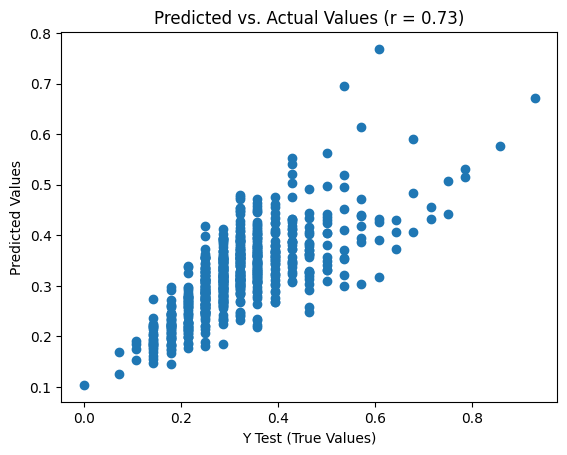

In [ ]:
# Creating a Correlation Coefficient and Display on Plot Title
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions_Polynomial1)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions_Polynomial1)[0], 2))
plt.show()

<ipython-input-83-251ea0206774>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - predictions_Polynomial1), bins = 50)


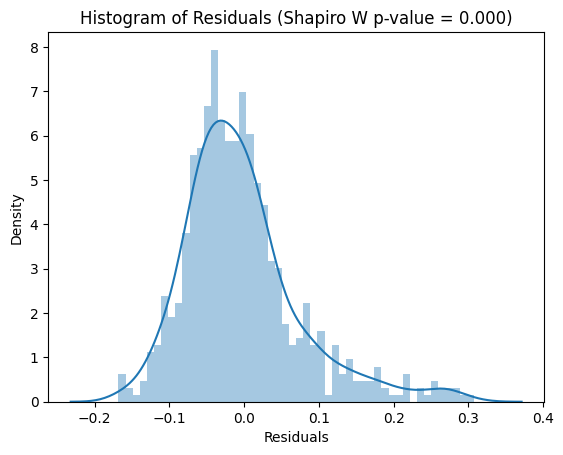

In [ ]:
# Create a density plot of the residuals.
import seaborn as sns
from scipy.stats import shapiro
sns.distplot ((y_test - predictions_Polynomial1), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test -predictions_Polynomial1)[1]))
plt.show()


In [ ]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_squared_error (y_test, predictions_Polynomial1),
np.sqrt (metrics.mean_squared_error (y_test, predictions_Polynomial1)),
metrics.explained_variance_score (y_test, predictions_Polynomial1)]}).round(3)
print(metrics_df)

      Metric  Value
0        MSE  0.006
1       RMSE  0.078
2  R-Squared  0.539


**degree**=2

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the degree of the polynomial
degree = 2

# Create a polynomial regression model
model_Polynomial2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())


In [ ]:
model_Polynomial2.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
predictions_Polynomial2 = model_Polynomial2.predict(X_test)

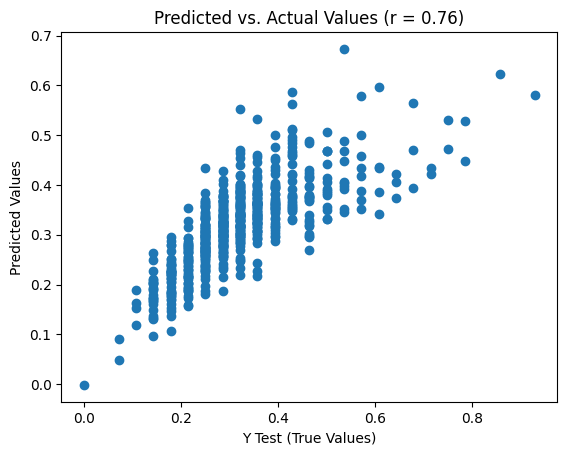

In [ ]:
# Creating a Correlation Coefficient and Display on Plot Title
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions_Polynomial2)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions_Polynomial2)[0], 2))
plt.show()

<ipython-input-89-30b952f113f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - predictions_Polynomial2), bins = 50)


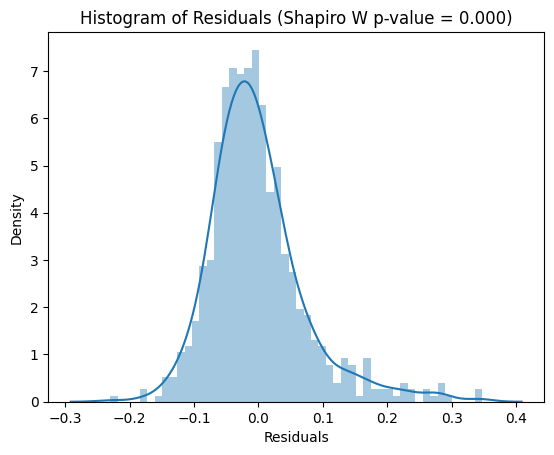

In [ ]:
# Create a density plot of the residuals.
import seaborn as sns
from scipy.stats import shapiro
sns.distplot ((y_test - predictions_Polynomial2), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test -predictions_Polynomial2)[1]))
plt.show()

In [ ]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_squared_error (y_test, predictions_Polynomial2),
np.sqrt (metrics.mean_squared_error (y_test, predictions_Polynomial2)),
metrics.explained_variance_score (y_test, predictions_Polynomial2)]}).round(3)
print(metrics_df)

      Metric  Value
0        MSE  0.006
1       RMSE  0.075
2  R-Squared  0.577


**Comparison between Polynomial_degree1 and Polynomial_degree2**

In [ ]:
import pandas as pd
from sklearn import metrics

metrics_1 = {
    'Metric': ['MSE', 'RMSE', 'R-Squared'],
    'Polynomial_degree1': [metrics.mean_squared_error(y_test, predictions_Polynomial1),
                np.sqrt(metrics.mean_squared_error(y_test, predictions_Polynomial1)),
                metrics.explained_variance_score(y_test, predictions_Polynomial1)]
}
metrics_df_1 = pd.DataFrame(metrics_1)

metrics_2 = {
    'Metric': ['MSE', 'RMSE', 'R-Squared'],
    'Polynomial_degree2': [metrics.mean_squared_error(y_test, predictions_Polynomial2),
                np.sqrt(metrics.mean_squared_error(y_test, predictions_Polynomial2)),
                metrics.explained_variance_score(y_test, predictions_Polynomial2)]
}
metrics_df_2 = pd.DataFrame(metrics_2)

comparison_df = pd.merge(metrics_df_1, metrics_df_2, on='Metric')
comparison_df


,Metric,Polynomial_degree1,Polynomial_degree2
0,MSE,0.006104,0.005599
1,RMSE,0.078130,0.074829
2,R-Squared,0.539446,0.577155


Based on the result, polynomial regression model with **degree=2 has better performance**
- lower MSE
- lower RMSE
- higher R-Squared

##**Ridge Regression**

**Experiment with different values of regularization strength (alpha)**

**(alpha**=0.1**)**

In [ ]:
from sklearn.linear_model import Ridge

# Choose a value for lambda (alpha in scikit-learn)
alpha = 0.1
model_Ridge1 = Ridge(alpha=alpha)


In [ ]:
model_Ridge1.fit(X_train, y_train)


Ridge(alpha=0.1)

In [ ]:
predictions_Ridge1 = model_Ridge1.predict(X_test)

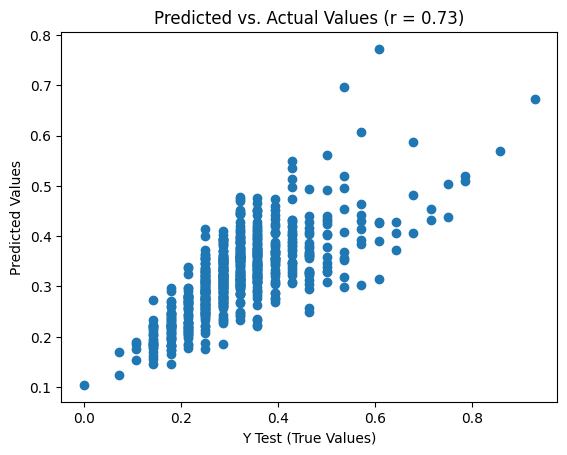

In [ ]:
# Creating a Correlation Coefficient and Display on Plot Title
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions_Ridge1)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions_Ridge1)[0], 2))
plt.show()

<ipython-input-96-77cdd924bcc2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - predictions_Ridge1), bins = 50)


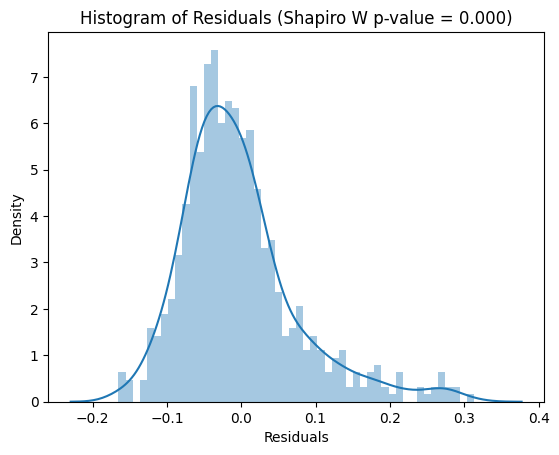

In [ ]:
# Create a density plot of the residuals.
import seaborn as sns
from scipy.stats import shapiro
sns.distplot ((y_test - predictions_Ridge1), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test -predictions_Ridge1)[1]))
plt.show()

In [ ]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_squared_error (y_test, predictions_Ridge1),
np.sqrt (metrics.mean_squared_error (y_test, predictions_Ridge1)),
metrics.explained_variance_score (y_test, predictions_Ridge1)]}).round(3)
print(metrics_df)

      Metric  Value
0        MSE  0.006
1       RMSE  0.078
2  R-Squared  0.536


**(alpha**=1.0**)**

In [ ]:
from sklearn.linear_model import Ridge

# Choose a value for lambda (alpha in scikit-learn)
alpha = 1
model_Ridge2 = Ridge(alpha=alpha)

In [ ]:
model_Ridge2.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
predictions_Ridge2 = model_Ridge2.predict(X_test)

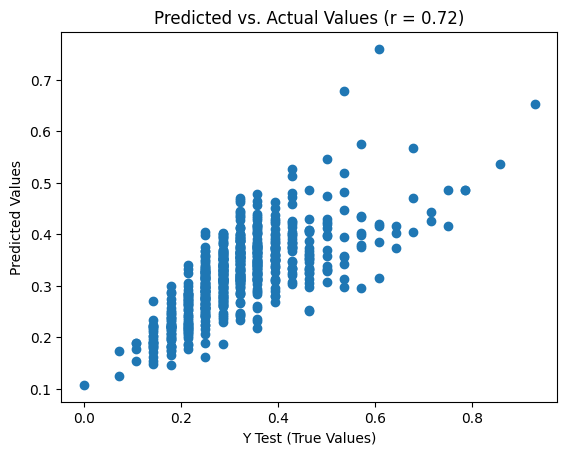

In [ ]:
# Creating a Correlation Coefficient and Display on Plot Title
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions_Ridge2)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions_Ridge2)[0], 2))
plt.show()

<ipython-input-102-38f997d863e6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test - predictions_Ridge2), bins = 50)


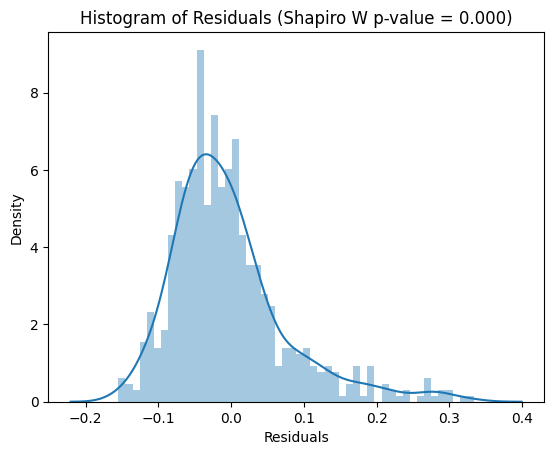

In [ ]:
# Create a density plot of the residuals.
import seaborn as sns
from scipy.stats import shapiro
sns.distplot ((y_test - predictions_Ridge2), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test -predictions_Ridge2)[1]))
plt.show()

In [ ]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_squared_error (y_test, predictions_Ridge2),
np.sqrt (metrics.mean_squared_error (y_test, predictions_Ridge2)),
metrics.explained_variance_score (y_test, predictions_Ridge2)]}).round(3)
print(metrics_df)

      Metric  Value
0        MSE  0.006
1       RMSE  0.080
2  R-Squared  0.517


**Comparison between Ridge_Alpha0.1 and Ridge_Alpha1**

In [ ]:
import pandas as pd
from sklearn import metrics
import numpy as np

metrics_alpha_01 = {
    'Metric': ['MSE', 'RMSE', 'R-Squared'],
    'Ridge_Alpha0.1': [
        metrics.mean_squared_error(y_test, predictions_Ridge1),
        np.sqrt(metrics.mean_squared_error(y_test, predictions_Ridge1)),
        metrics.explained_variance_score(y_test, predictions_Ridge1)
    ]
}
metrics_df_alpha_01 = pd.DataFrame(metrics_alpha_01)

metrics_alpha_1 = {
    'Metric': ['MSE', 'RMSE', 'R-Squared'],
    'Ridge_Alpha1': [
        metrics.mean_squared_error(y_test, predictions_Ridge2),
        np.sqrt(metrics.mean_squared_error(y_test, predictions_Ridge2)),
        metrics.explained_variance_score(y_test, predictions_Ridge2)
    ]
}
metrics_df_alpha_1 = pd.DataFrame(metrics_alpha_1)

comparison_df = pd.merge(metrics_df_alpha_01, metrics_df_alpha_1, on='Metric')
comparison_df



,Metric,Ridge_Alpha0.1,Ridge_Alpha1
0,MSE,0.006158,0.006408
1,RMSE,0.078471,0.080052
2,R-Squared,0.535554,0.516623


Based on the result, ridge regression model **with alpha=0.1 has better performance**
- lower MSE
- lower RMSE
- higher R-Squared

#Model Evaluation

**Linear Regression**

MSE        0.006

RMSE       0.078

R-Squared  0.539

---

**Polynomial Regression** **(degree=2)**

MSE        0.006

RMSE       0.075

R-Squared  0.577

---

**Ridge Regression** **(alpha=0.1)**

MSE        0.006

RMSE       0.078

R-Squared  0.536

---

#Conclusion


Based on the provided results, the **best model is Polynomial Regression with degree=2**.

Reason:
- lower MSE
- lower RMSE
- higher R-Squared


It captures the relationship between the features and the target variable more effectively, resulting in more accurate predictions compared to Linear Regression and Ridge Regression with alpha=0.1.




#**END**